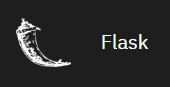

### 1. Explain GET and POST methods.

**GET and POST are two HTTP methods used for communication between clients and servers.**

### GET Method:

1. **Purpose:**
   - Used for requesting data from a specified resource.
   - Primarily used for retrieving information.
   - Parameters are appended to the URL in the form of a query string.

2. **Visibility:**
   - Parameters are visible in the URL, as they are part of the query string.
   - Limited capacity for data transfer due to URL length constraints.

3. **Caching:**
   - Responses can be cached, and browsers might cache the URL and its parameters.

4. **Idempotent:**
   - GET requests are considered idempotent, meaning making the same request multiple times has the same effect as making it once.

5. **Security:**
   - Generally considered safer than POST because it does not change the state on the server.

6. **Example:**
   - Retrieving a list of items: `GET /api/items`
   - Getting details of a specific item: `GET /api/items/123`

### POST Method:

1. **Purpose:**
   - Used for submitting data to be processed to a specified resource.
   - Primarily used for creating or updating a resource on the server.

2. **Visibility:**
   - Parameters are included in the request body, not visible in the URL.
   - Suitable for larger amounts of data.

3. **Caching:**
   - Responses are typically not cached, as the same request might result in different server-side changes.

4. **Idempotent:**
   - POST requests are not considered idempotent. Making the same request multiple times may have different effects.

5. **Security:**
   - Can be less secure than GET if not handled properly, especially if sensitive data is included in the request body.

6. **Example:**
   - Creating a new user: `POST /api/users`
   - Updating details of an existing item: `POST /api/items/123`

### When to Use Each:

- **Use GET when:**
  - Retrieving data that does not change server state.
  - Requests are safe and idempotent.
  - The amount of data to be transferred is small.

- **Use POST when:**
  - Submitting data that will change server state.
  - Requests are not idempotent.
  - Handling sensitive information.
  - Transferring a larger amount of data.

It's essential to choose the appropriate method based on the intended operation and adhere to the principles and conventions of RESTful API design.

### 2. Why is request used in Flask?

In Flask, the `request` object is used to access incoming request data, such as form data, query parameters, and more. It provides a way for a Flask application to interact with data sent by a client in an HTTP request. The `request` object is an instance of the `Request` class, which is part of the Werkzeug WSGI utility library.

Here are some common use cases for the `request` object in Flask:

1. **Accessing Form Data:**
   - When a client submits an HTML form with the POST method, the form data is included in the request body. The `request` object allows you to access this form data.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/submit', methods=['POST'])
   def submit_form():
       username = request.form.get('username')
       password = request.form.get('password')
       # Process the form data
       return f'Username: {username}, Password: {password}'
   ```

2. **Handling Query Parameters:**
   - When a client sends data as query parameters in the URL (typically with the GET method), the `request` object allows you to access these parameters.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/search', methods=['GET'])
   def search():
       query = request.args.get('query')
       # Process the query parameter
       return f'Searching for: {query}'
   ```

3. **Accessing JSON Data:**
   - When a client sends data in the JSON format, typically in the request body, the `request` object allows you to access this JSON data.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/json', methods=['POST'])
   def process_json():
       data = request.get_json()
       # Process the JSON data
       return f'Received JSON data: {data}'
   ```

4. **Handling File Uploads:**
   - When a client uploads a file, the `request` object allows you to access the uploaded file.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/upload', methods=['POST'])
   def upload_file():
       uploaded_file = request.files['file']
       # Process the uploaded file
       return f'Uploaded file: {uploaded_file.filename}'
   ```

5. **Accessing Headers and Cookies:**
   - The `request` object allows you to access HTTP headers and cookies sent by the client.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/headers')
   def show_headers():
       user_agent = request.headers.get('User-Agent')
       cookie_value = request.cookies.get('my_cookie')
       # Process headers and cookies
       return f'User-Agent: {user_agent}, Cookie: {cookie_value}'
   ```

The `request` object provides a convenient way to interact with incoming request data and is a crucial component for handling user input and performing actions based on client requests in a Flask application.

### 3. Why is redirect() used in Flask?

In Flask, the `redirect()` function is used to perform a redirection to another endpoint or URL. It is a convenient way to send the client's browser to a different location after processing a request. The primary use cases for `redirect()` include:

1. **After Form Submission:**
   - When a user submits a form, especially one that involves data modification (e.g., submitting a login form, updating user details), it is common to redirect the user to another page after processing the form data. This helps prevent the user from unintentionally resubmitting the form if they refresh the page.

   ```python
   from flask import Flask, render_template, request, redirect, url_for

   app = Flask(__name__)

   @app.route('/login', methods=['POST'])
   def login():
       # Process login form data
       username = request.form.get('username')
       # Perform authentication...

       # Redirect to the user's profile page after successful login
       return redirect(url_for('user_profile', username=username))

   @app.route('/user/<username>')
   def user_profile(username):
       # Display user profile page
       return f'User Profile: {username}'
   ```

2. **Changing URLs:**
   - It allows for the creation of clean and user-friendly URLs by redirecting to a different endpoint with a more meaningful path.

   ```python
   from flask import Flask, redirect, url_for

   app = Flask(__name__)

   @app.route('/old_path')
   def old_path():
       # Redirect to a new and improved URL
       return redirect(url_for('new_path'))

   @app.route('/new_path')
   def new_path():
       # Handle the request for the new path
       return 'This is the new path!'
   ```

3. **External Redirects:**
   - It can be used to redirect users to external URLs, not just within the same Flask application.

   ```python
   from flask import Flask, redirect

   app = Flask(__name__)

   @app.route('/go_to_google')
   def go_to_google():
       # Redirect to an external URL
       return redirect('https://www.google.com')
   ```

4. **Conditional Redirects:**
   - Depending on certain conditions or business logic, a redirect can be used to guide the user to different pages or external sites.

   ```python
   from flask import Flask, redirect, url_for

   app = Flask(__name__)

   @app.route('/redirect_based_on_condition')
   def redirect_based_on_condition():
       if condition:
           return redirect(url_for('page_a'))
       else:
           return redirect(url_for('page_b'))

   @app.route('/page_a')
   def page_a():
       return 'This is Page A'

   @app.route('/page_b')
   def page_b():
       return 'This is Page B'
   ```

The `redirect()` function in Flask is a useful tool for managing the flow of a web application by sending the client's browser to a different location after processing a request. It is commonly used to improve the user experience, manage navigation, and create clean and meaningful URLs.

### 4. What are templates in Flask? Why is the render_template() function used?

In Flask, templates are used to separate the presentation logic from the business logic of a web application. A template is essentially an HTML file with placeholders for dynamic content that will be filled in by the Flask application during runtime. These placeholders, often called variables, are replaced with actual data when rendering the template.

Flask uses the Jinja2 templating engine, which allows for dynamic content, control structures, and template inheritance.

The `render_template()` function in Flask is used to render templates by combining them with data to produce the final HTML that is sent to the client's browser. This function takes the name of the template file as its first argument and any additional keyword arguments representing variables that should be available in the template.

Here's a simple example to illustrate the use of templates and the `render_template()` function:

1. Create a Flask application with a template folder:

   ```plaintext
   /your_project_folder
       /templates
           index.html
       app.py
   ```

2. In `index.html`:

   ```html
   <!DOCTYPE html>
   <html lang="en">
   <head>
       <meta charset="UTF-8">
       <meta http-equiv="X-UA-Compatible" content="IE=edge">
       <meta name="viewport" content="width=device-width, initial-scale=1.0">
       <title>{{ title }}</title>
   </head>
   <body>
       <h1>{{ greeting }}</h1>
       <p>This is a Flask template example.</p>
   </body>
   </html>
   ```

3. In `app.py`:

   ```python
   from flask import Flask, render_template

   app = Flask(__name__)

   @app.route('/')
   def index():
       # Data to be passed to the template
       data = {
           'title': 'Flask Template Example',
           'greeting': 'Hello, Flask!'
       }
       # Rendering the template with data
       return render_template('index.html', **data)

   if __name__ == '__main__':
       app.run(debug=True)
   ```

In this example:

- The `index()` route function passes a dictionary (`data`) to the `render_template()` function. The keys in this dictionary (`title` and `greeting`) correspond to the variables used in the `index.html` template.

- The `render_template()` function reads the `index.html` template, replaces the placeholders with the values from the `data` dictionary, and produces the final HTML response.

- When a user accesses the root URL (`http://127.0.0.1:5000/`), they will see the rendered HTML page with the dynamic content.

Using templates and the `render_template()` function helps maintain a clean separation between the presentation layer (HTML) and the application logic in a Flask web application, making it easier to manage and update the user interface.

### 5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

Certainly! Here's how you can create a simple Flask API, run it in VSCode, and test it using Postman:

1. **Install Flask:**
   Open the terminal in VSCode and run the following command to install Flask:
   ```bash
   pip install Flask
   ```

2. **Create a Flask API:**
   Create a new Python file (e.g., `app.py`) and add the following code:

   ```python
   from flask import Flask, jsonify, request

   app = Flask(__name__)

   @app.route('/api/greet', methods=['POST'])
   def greet():
       # Parse JSON data from the request body
       data = request.get_json()

       # Extract the 'name' parameter from the JSON data
       name = data.get('name', 'Guest')

       # Construct a greeting message
       greeting = f'Hello, {name}!'

       # Return the greeting as JSON
       return jsonify({'greeting': greeting})

   if __name__ == '__main__':
       app.run(debug=True)
   ```

3. **Run the Flask API:**
   Save the `app.py` file and run it in the terminal in VSCode:
   ```bash
   python app.py
   ```

   This will start the Flask development server.

4. **Test the API using Postman:**
   - Open Postman.
   - Create a new request.
   - Set the request type to `POST`.
   - Enter the URL: `http://127.0.0.1:5000/api/greet`.
   - Go to the "Body" tab, select `raw`, and enter JSON data like:
     ```json
     {
         "name": "Susheel kumar yadav"
     }
     ```
   - Click "Send."

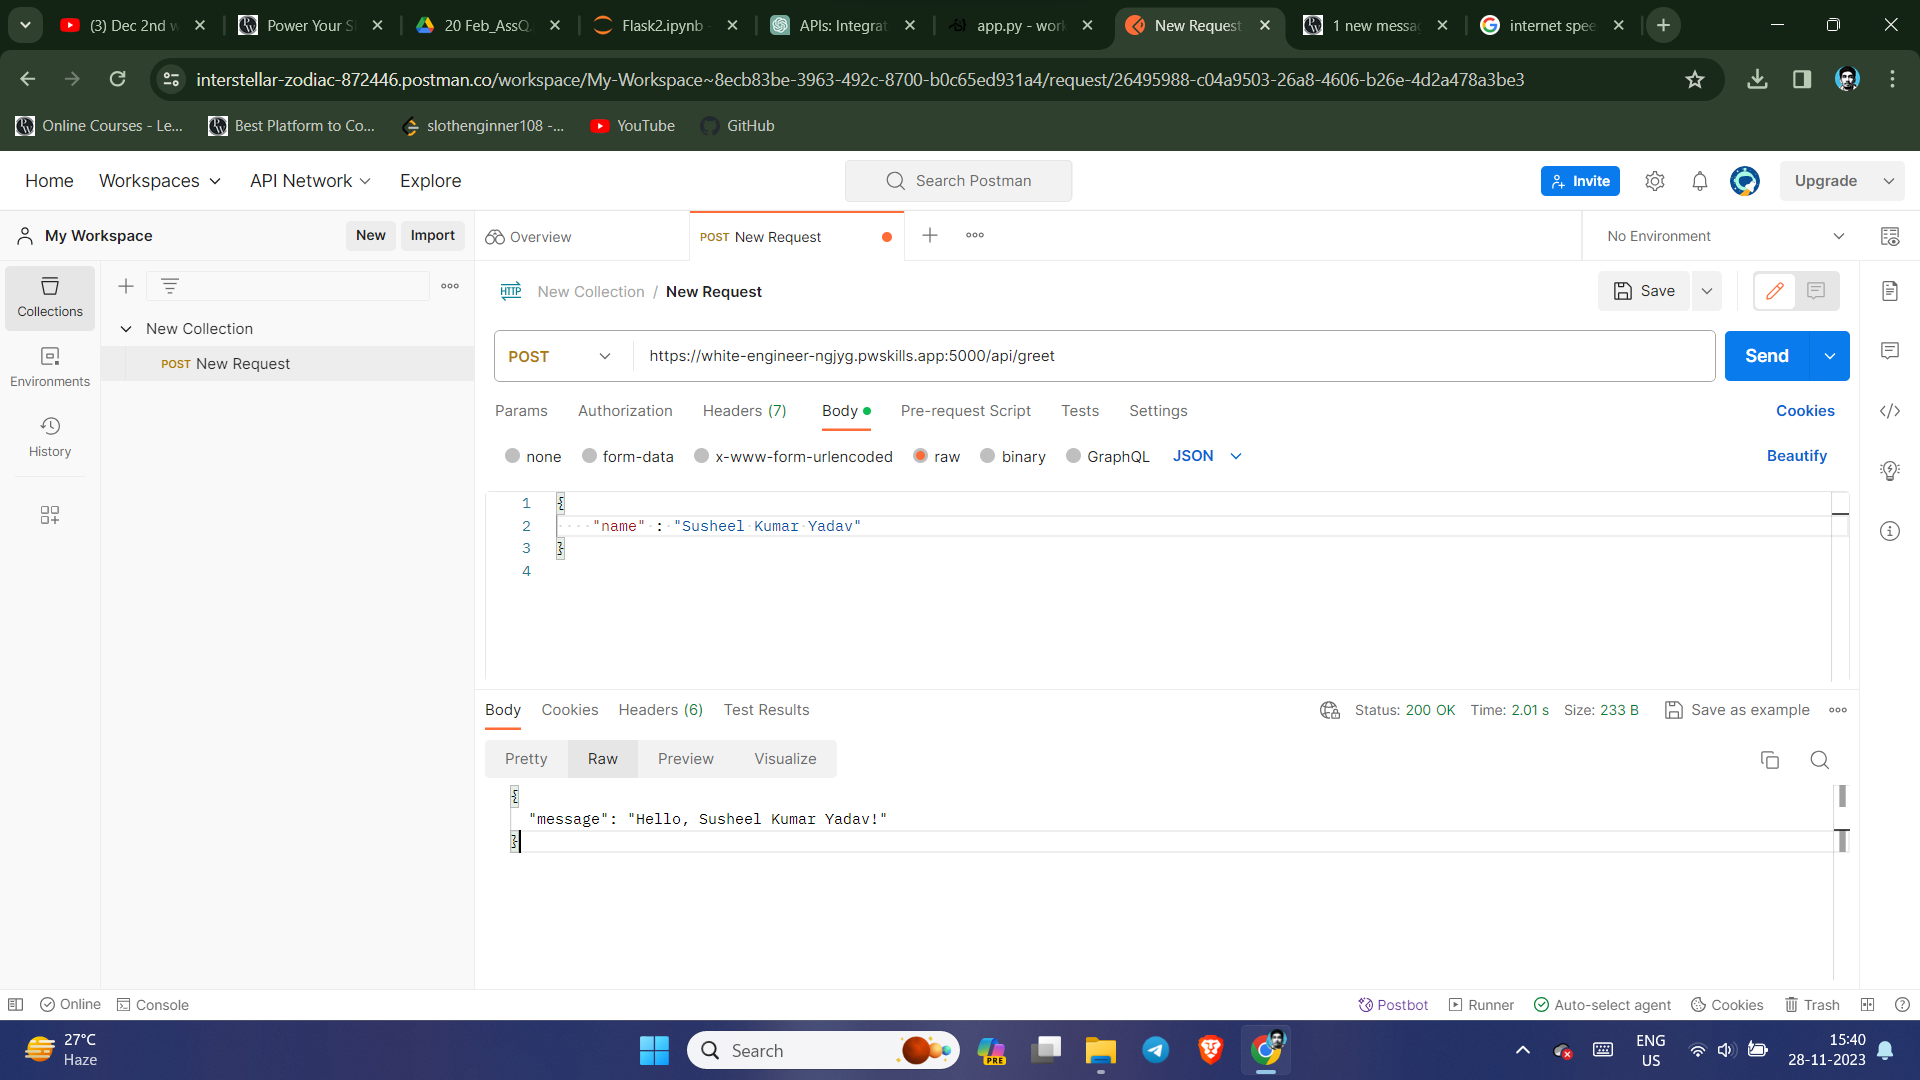